              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4953
           1       0.63      0.26      0.36        47

    accuracy                           0.99      5000
   macro avg       0.81      0.63      0.68      5000
weighted avg       0.99      0.99      0.99      5000

ROC-AUC: 0.7578944203169364


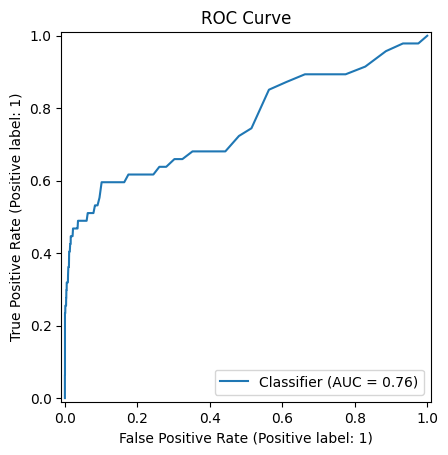

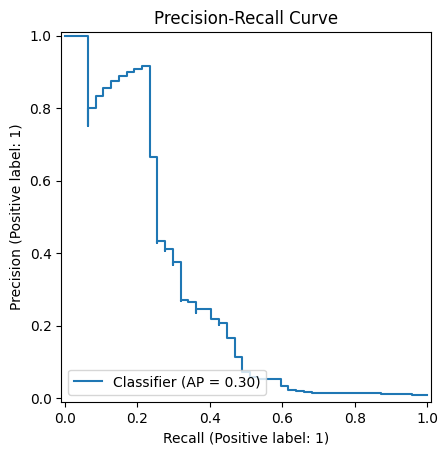

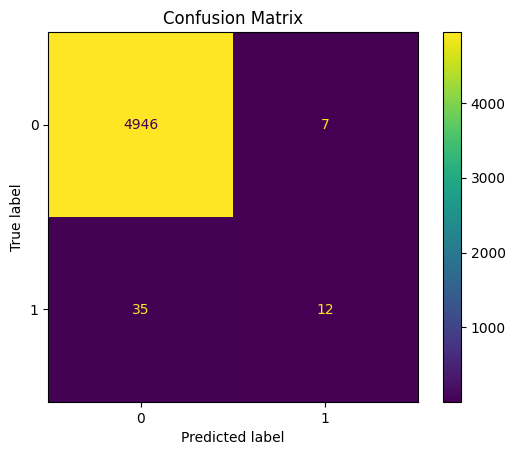

In [ ]:
# Fraud Detection - Imbalanced Classification

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load dataset OR generate synthetic if missing
try:
    df = pd.read_csv("creditcard.csv")  # Kaggle dataset
    target = "Class"
except:
    from sklearn.datasets import make_classification
    X,y = make_classification(n_samples=20000,n_features=20,n_informative=5,n_redundant=5,
                              weights=[0.995,0.005],random_state=42)
    df = pd.DataFrame(X,columns=[f"f{i}" for i in range(20)])
    df["Class"]=y
    target="Class"

X=df.drop(columns=[target])
y=df[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

pipe = Pipeline([
    ("smote",SMOTE(random_state=42)),
    ("scaler",StandardScaler()),
    ("clf",RandomForestClassifier(n_estimators=300,random_state=42))
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_prob=pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC-AUC:",roc_auc_score(y_test,y_prob))

RocCurveDisplay.from_predictions(y_test,y_prob)
plt.title("ROC Curve")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test,y_prob)
plt.title("Precision-Recall Curve")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title("Confusion Matrix")
plt.show()
